In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_competition/eye_ai/annotation_file.csv')

In [ ]:
df

,filename,age,AC,SBP,DBP,HDLC,TG,BS,METS,img_path,CV
0,img75151275_00_1R.jpg,62,98.2,147,93,56,152,96,1,/content/第5回日本眼科AI学会総会 眼科AIコンテスト/images_train_...,2
1,img96940480_00_1R.jpg,65,81.3,168,91,60,124,81,0,/content/第5回日本眼科AI学会総会 眼科AIコンテスト/images_train_...,4
2,img15900654_00_1R.jpg,65,96.8,127,86,47,171,104,1,/content/第5回日本眼科AI学会総会 眼科AIコンテスト/images_train_...,4
3,img74960801_00_1R.jpg,64,85.0,135,85,67,138,132,0,/content/第5回日本眼科AI学会総会 眼科AIコンテスト/images_train_...,5
4,img37629509_00_1R.jpg,65,95.1,134,75,54,95,77,0,/content/第5回日本眼科AI学会総会 眼科AIコンテスト/images_train_...,5
...,...,...,...,...,...,...,...,...,...,...,...
4995,img74957713_00_1R.jpg,18,64.2,111,60,51,70,85,0,/content/第5回日本眼科AI学会総会 眼科AIコンテスト/images_train_...,1
4996,img49041901_00_1R.jpg,18,90.2,135,81,37,131,86,1,/content/第5回日本眼科AI学会総会 眼科AIコンテスト/images_train_...,1
4997,img07711529_00_1R.jpg,18,94.1,137,62,43,169,80,1,/content/第5回日本眼科AI学会総会 眼科AIコンテスト/images_train_...,3
4998,img54358369_00_1R.jpg,18,68.5,134,73,51,62,95,0,/content/第5回日本眼科AI学会総会 眼科AIコンテスト/images_train_...,1


In [ ]:
%cd /content/drive/MyDrive/AI_competition/eye_ai

/content/drive/MyDrive/AI_competition/eye_ai


In [ ]:
# zipファイルを解凍

import zipfile
from pathlib import Path

# 解凍するZIPファイルのパス
zip_path = Path('/content/drive/MyDrive/AI_competition/eye_ai/dataset.zip')

# 解凍先ディレクトリ
unzip_dir = Path('/content')

# 解凍先ディレクトリが存在しない場合は作成
unzip_dir.mkdir(parents=True, exist_ok=True)

# ZIPファイルの解凍
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f'ZIPファイルを {unzip_dir} に解凍しました')


ZIPファイルを /content に解凍しました


ここまでが共通のコード

# 正常異常画像の可視化を元にした人間による分類

In [ ]:

old_path = "/content/第5回日本眼科AI学会総会 眼科AIコンテスト/"
new_path = "/content/drive/MyDrive/AI_competition/eye_ai/dataset/"

# 'img_path' 列のファイルパスを置換
df['img_path'] = df['img_path'].str.replace(old_path, new_path)

UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/AI_competition/eye_ai/dataset/images_train_3/img21313440_00_1R.jpg'

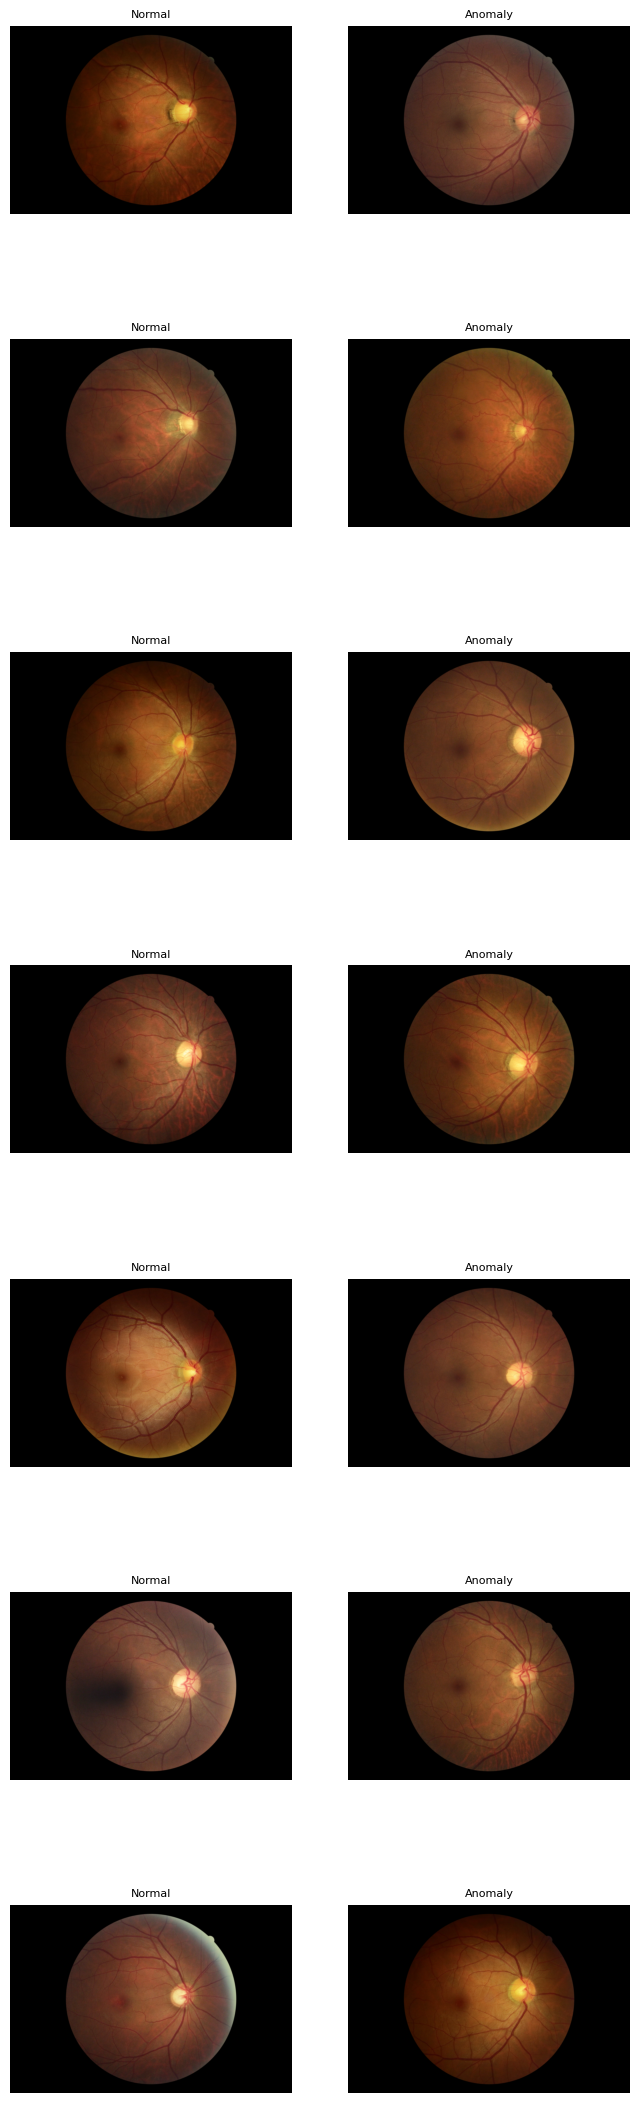

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 正常と異常の画像パスを取得
normal_images = df[df['METS'] == 0]['img_path'].values
anomaly_images = df[df['METS'] == 1]['img_path'].values

# 画像の枚数を指定
n = 20

# 正常画像と異常画像のそれぞれn枚を抽出
normal_images_sample = np.random.choice(normal_images, min(n, len(normal_images)), replace=False)
anomaly_images_sample = np.random.choice(anomaly_images, min(n, len(anomaly_images)), replace=False)

# 画像を左右に並べて可視化する関数
def plot_images_side_by_side(normal_images, anomaly_images, n_cols=2):
    n_images = min(len(normal_images), len(anomaly_images))
    n_rows = int(np.ceil(n_images / n_cols))
    plt.figure(figsize=(n_cols * 4, n_rows * 4))  # 画像のサイズ調整

    for i in range(n_images):
        # 正常画像（左側）
        normal_img = mpimg.imread(normal_images[i])
        plt.subplot(n_rows, n_cols, 2 * i + 1)
        plt.imshow(normal_img)
        plt.title(f'Normal', fontsize=8)
        plt.axis('off')

        # 異常画像（右側）
        anomaly_img = mpimg.imread(anomaly_images[i])
        plt.subplot(n_rows, n_cols, 2 * i + 2)
        plt.imshow(anomaly_img)
        plt.title(f'Anomaly', fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 画像の可視化（左右に表示）
plot_images_side_by_side(normal_images_sample, anomaly_images_sample)


# 輝度ヒストグラムを実施

100%|██████████| 5000/5000 [01:53<00:00, 44.13it/s]


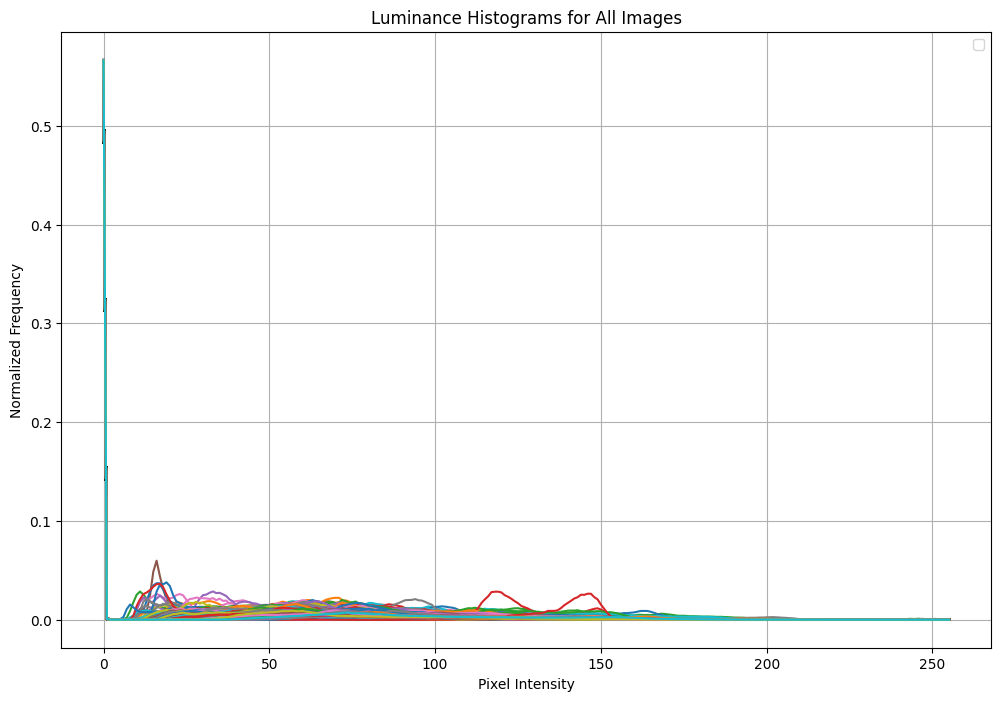

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# 画像ファイルパスが含まれている列を取得
img_paths = df['img_path'].tolist()

# プロットの準備
plt.figure(figsize=(12, 8))

# すべての画像のヒストグラムを計算してプロット
for img_path in tqdm(img_paths, total=len(img_paths)):
    # 画像をグレースケールで読み込む
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

    # ヒストグラムを計算
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    # 正規化（必要に応じて）
    hist = hist / hist.sum()

    # ヒストグラムをプロット
    plt.plot(hist) # , label=img_path

# グラフのタイトルとラベル
plt.title('Luminance Histograms for All Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend(loc='upper right')  # 凡例を表示
plt.grid(True)

# ヒストグラムを表示
plt.show()


100%|██████████| 5000/5000 [01:45<00:00, 47.38it/s]


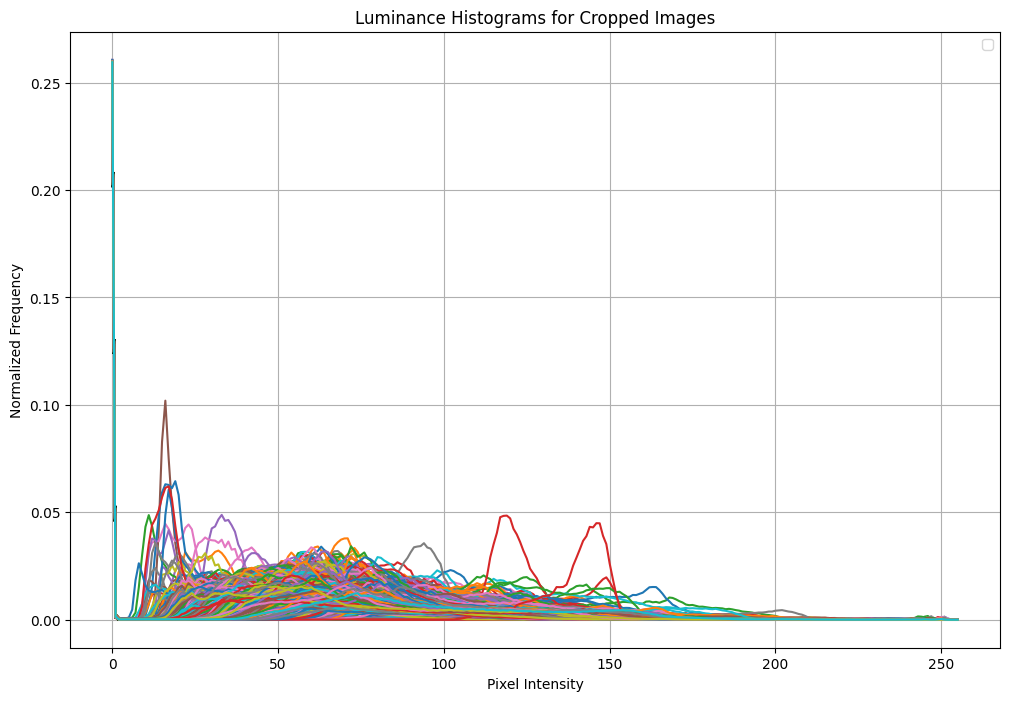

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import albumentations as A

# 画像ファイルパスが含まれている列を取得
img_paths = df['img_path'].tolist()

# CenterCropの設定（クロップするサイズを指定）
crop_transform = A.Compose([
    A.CenterCrop(height=1200, width=1200, always_apply=True)  # 高さと幅を指定
])

# プロットの準備
plt.figure(figsize=(12, 8))

# すべての画像のヒストグラムを計算してプロット
for img_path in tqdm(img_paths, total=len(img_paths)):
    # 画像をグレースケールで読み込む
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

    # Albumentationsで中心部分をクロップ
    cropped = crop_transform(image=img)['image']

    # ヒストグラムを計算
    hist = cv2.calcHist([cropped], [0], None, [256], [0, 256])

    # 正規化（必要に応じて）
    hist = hist / hist.sum()

    # ヒストグラムをプロット
    plt.plot(hist)  # , label=img_path  # ラベル表示はオプション

# グラフのタイトルとラベル
plt.title('Luminance Histograms for Cropped Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend(loc='upper right')  # 凡例を表示（複数画像時に便利）
plt.grid(True)

# ヒストグラムを表示
plt.show()


100%|██████████| 5000/5000 [01:37<00:00, 51.51it/s]


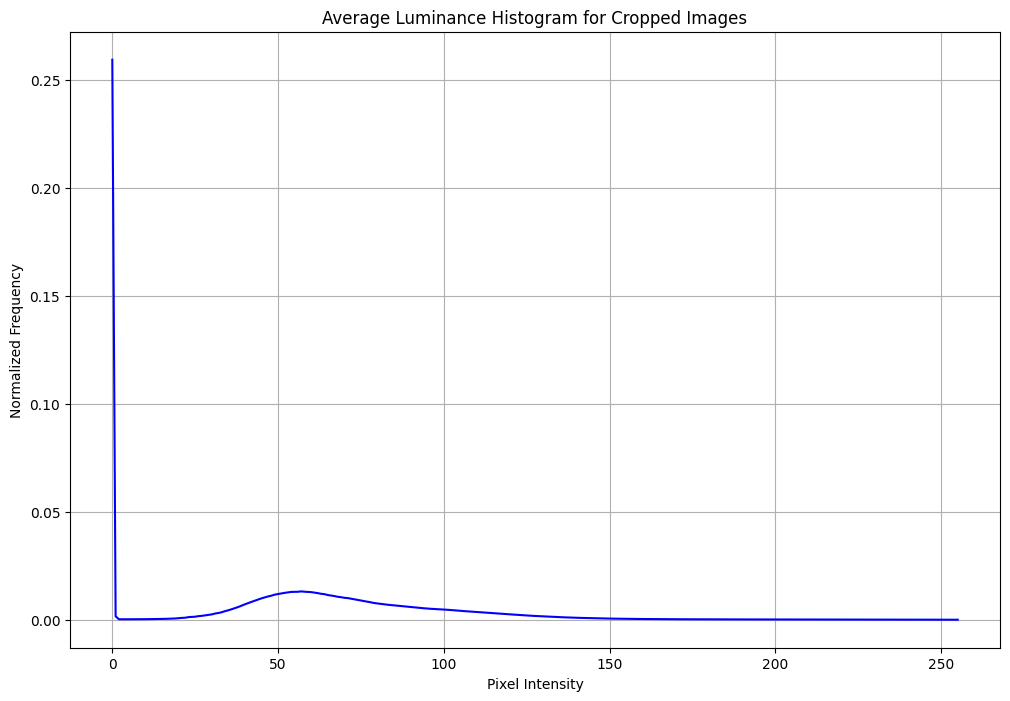

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import albumentations as A
import numpy as np

# 画像ファイルパスが含まれている列を取得
img_paths = df['img_path'].tolist()

# CenterCropの設定（クロップするサイズを指定）
crop_transform = A.Compose([
    A.CenterCrop(height=1200, width=1200, always_apply=True)  # 高さと幅を指定
])

# ヒストグラムの累積を保持する配列を作成（ゼロで初期化）
cumulative_hist = np.zeros((256, 1))

# すべての画像のヒストグラムを計算して累積
for img_path in tqdm(img_paths, total=len(img_paths)):
    # 画像をグレースケールで読み込む
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

    # Albumentationsで中心部分をクロップ
    cropped = crop_transform(image=img)['image']

    # ヒストグラムを計算
    hist = cv2.calcHist([cropped], [0], None, [256], [0, 256])

    # ヒストグラムを累積
    cumulative_hist += hist

# ヒストグラムを平均化
average_hist = cumulative_hist / len(img_paths)

# 正規化（必要に応じて）
average_hist = average_hist / average_hist.sum()

# 平均ヒストグラムをプロット
plt.figure(figsize=(12, 8))
plt.plot(average_hist, color='blue')

# グラフのタイトルとラベル
plt.title('Average Luminance Histogram for Cropped Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.grid(True)

# ヒストグラムを表示
plt.show()


100%|██████████| 5000/5000 [01:35<00:00, 52.63it/s]


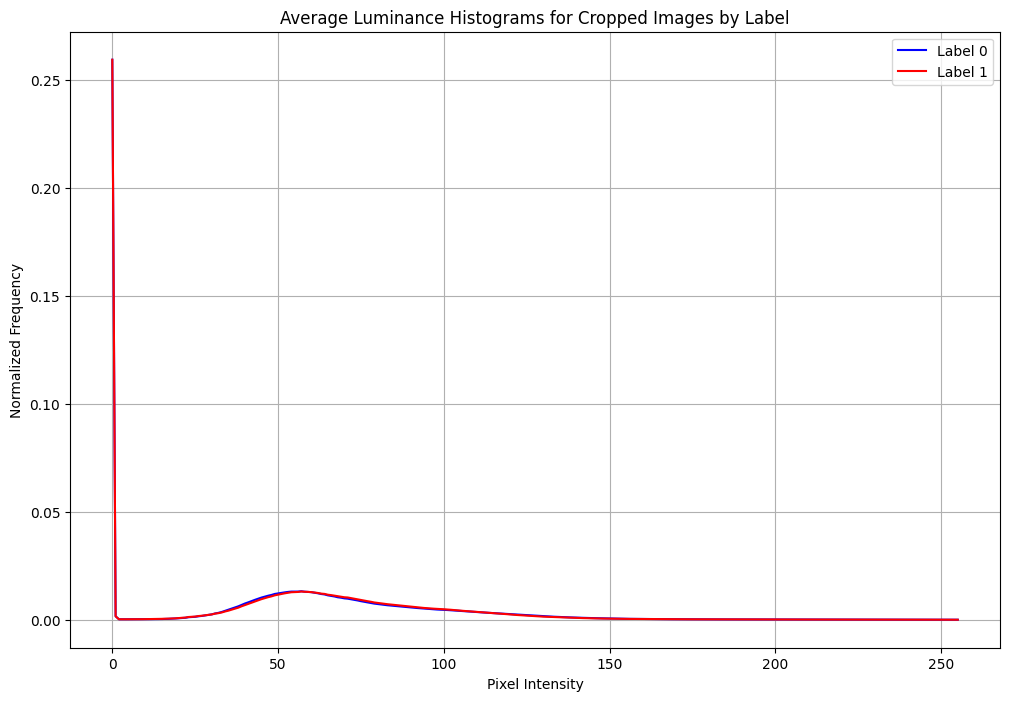

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import albumentations as A
import numpy as np

# 画像ファイルパスが含まれている列を取得
img_paths = df['img_path'].tolist()
labels = df['METS'].tolist()

# CenterCropの設定（クロップするサイズを指定）
crop_transform = A.Compose([
    A.CenterCrop(height=1200, width=1200, always_apply=True)  # 高さと幅を指定
])

# ラベルごとのヒストグラムの累積を保持する配列を作成
cumulative_hist_0 = np.zeros((256, 1))
cumulative_hist_1 = np.zeros((256, 1))
count_0 = 0
count_1 = 0

# すべての画像のヒストグラムを計算して累積
for img_path, label in tqdm(zip(img_paths, labels), total=len(img_paths)):
    # 画像をグレースケールで読み込む
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

    # Albumentationsで中心部分をクロップ
    cropped = crop_transform(image=img)['image']

    # ヒストグラムを計算
    hist = cv2.calcHist([cropped], [0], None, [256], [0, 256])

    # ヒストグラムを累積
    if label == 0:
        cumulative_hist_0 += hist
        count_0 += 1
    else:
        cumulative_hist_1 += hist
        count_1 += 1

# ヒストグラムを平均化
average_hist_0 = cumulative_hist_0 / count_0
average_hist_1 = cumulative_hist_1 / count_1

# 正規化
average_hist_0 /= average_hist_0.sum()
average_hist_1 /= average_hist_1.sum()

# 平均ヒストグラムをプロット
plt.figure(figsize=(12, 8))
plt.plot(average_hist_0, color='blue', label='Label 0')
plt.plot(average_hist_1, color='red', label='Label 1')

# グラフのタイトルとラベル
plt.title('Average Luminance Histograms for Cropped Images by Label')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend(loc='upper right')
plt.grid(True)

# ヒストグラムを表示
plt.show()


100%|██████████| 5000/5000 [01:34<00:00, 52.95it/s]


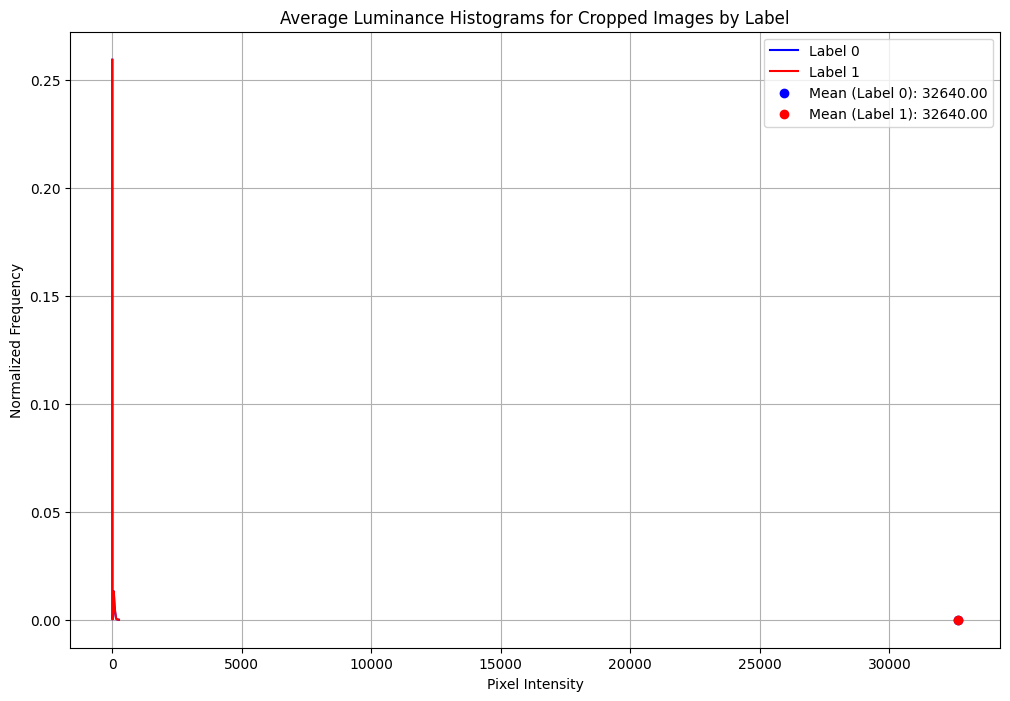

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import albumentations as A
import numpy as np

# 画像ファイルパスが含まれている列を取得
img_paths = df['img_path'].tolist()
labels = df['METS'].tolist()

# CenterCropの設定（クロップするサイズを指定）
crop_transform = A.Compose([
    A.CenterCrop(height=1200, width=1200, always_apply=True)  # 高さと幅を指定
])

# ラベルごとのヒストグラムの累積を保持する配列を作成
cumulative_hist_0 = np.zeros((256, 1))
cumulative_hist_1 = np.zeros((256, 1))
count_0 = 0
count_1 = 0

# すべての画像のヒストグラムを計算して累積
for img_path, label in tqdm(zip(img_paths, labels), total=len(img_paths)):
    # 画像をグレースケールで読み込む
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

    # Albumentationsで中心部分をクロップ
    cropped = crop_transform(image=img)['image']

    # ヒストグラムを計算
    hist = cv2.calcHist([cropped], [0], None, [256], [0, 256])

    # ヒストグラムを累積
    if label == 0:
        cumulative_hist_0 += hist
        count_0 += 1
    else:
        cumulative_hist_1 += hist
        count_1 += 1

# ヒストグラムを平均化
average_hist_0 = cumulative_hist_0 / count_0
average_hist_1 = cumulative_hist_1 / count_1

# 正規化
average_hist_0 /= average_hist_0.sum()
average_hist_1 /= average_hist_1.sum()

# 平均ヒストグラムをプロット
plt.figure(figsize=(12, 8))
plt.plot(average_hist_0, color='blue', label='Label 0')
plt.plot(average_hist_1, color='red', label='Label 1')

# 平均値を計算
mean_value_0 = np.sum(np.arange(256) * average_hist_0)
mean_value_1 = np.sum(np.arange(256) * average_hist_1)

# 平均値を表示（x軸にプロット）
plt.scatter([mean_value_0], [0], color='blue', marker='o', label=f'Mean (Label 0): {mean_value_0:.2f}', zorder=5)
plt.scatter([mean_value_1], [0], color='red', marker='o', label=f'Mean (Label 1): {mean_value_1:.2f}', zorder=5)

# グラフのタイトルとラベル
plt.title('Average Luminance Histograms for Cropped Images by Label')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend(loc='upper right')
plt.grid(True)

# ヒストグラムを表示
plt.show()


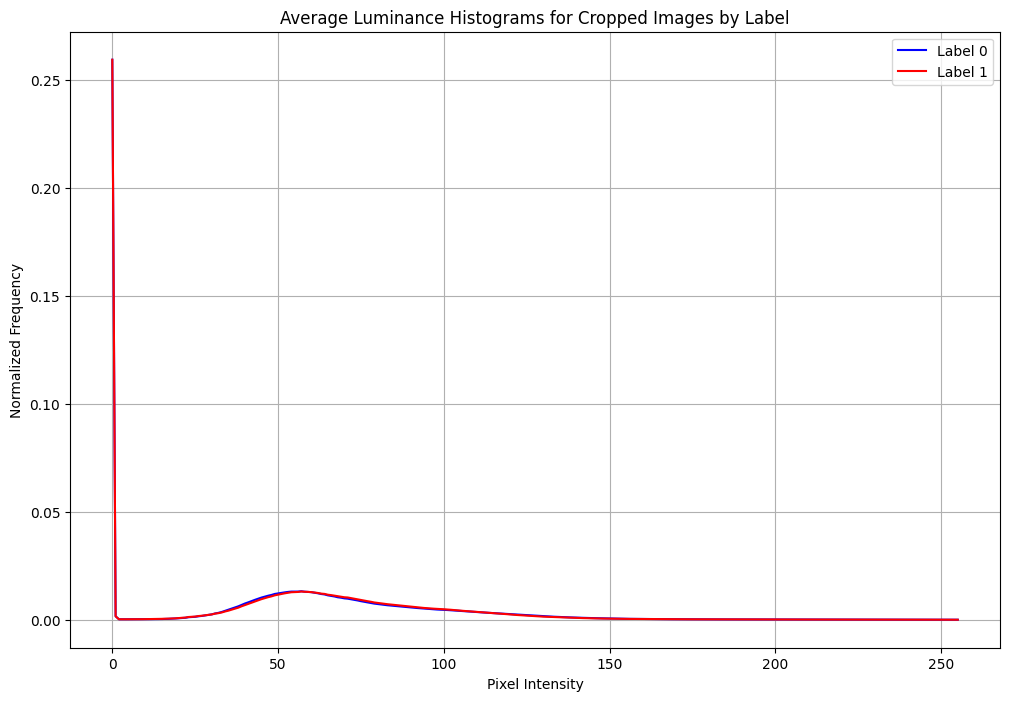

In [ ]:
# ヒストグラムを平均化
average_hist_0 = cumulative_hist_0 / count_0
average_hist_1 = cumulative_hist_1 / count_1

# 正規化
average_hist_0 /= average_hist_0.sum()
average_hist_1 /= average_hist_1.sum()

# 平均ヒストグラムをプロット
plt.figure(figsize=(12, 8))
plt.plot(average_hist_0, color='blue', label='Label 0')
plt.plot(average_hist_1, color='red', label='Label 1')

# 平均値を計算
mean_value_0 = np.sum(np.arange(256) * average_hist_0)
mean_value_1 = np.sum(np.arange(256) * average_hist_1)

# # 平均値を表示（x軸にプロット）
# plt.scatter([mean_value_0], [0], color='blue', marker='o', label=f'Mean (Label 0): {mean_value_0:.2f}', zorder=5)
# plt.scatter([mean_value_1], [0], color='red', marker='o', label=f'Mean (Label 1): {mean_value_1:.2f}', zorder=5)

# グラフのタイトルとラベル
plt.title('Average Luminance Histograms for Cropped Images by Label')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend(loc='upper right')
plt.grid(True)

# ヒストグラムを表示
plt.show()

In [ ]:
average_hist_0

array([[2.59435255e-01],
       [1.60330000e-03],
       [2.16583889e-04],
       [1.97206667e-04],
       [2.14378333e-04],
       [2.15019444e-04],
       [2.16028611e-04],
       [2.28783611e-04],
       [2.26231667e-04],
       [2.33431667e-04],
       [2.43902222e-04],
       [2.56160000e-04],
       [2.68770556e-04],
       [2.73306111e-04],
       [2.86516667e-04],
       [3.19443333e-04],
       [3.52377778e-04],
       [4.13001944e-04],
       [4.86220278e-04],
       [5.34808889e-04],
       [6.81782222e-04],
       [8.04305833e-04],
       [8.89418056e-04],
       [1.16103833e-03],
       [1.28050833e-03],
       [1.35006917e-03],
       [1.59705944e-03],
       [1.75326694e-03],
       [1.98529417e-03],
       [2.21621139e-03],
       [2.47974139e-03],
       [2.89679000e-03],
       [3.18497889e-03],
       [3.58894056e-03],
       [4.10540917e-03],
       [4.57416139e-03],
       [5.08846389e-03],
       [5.66352028e-03],
       [6.20617278e-03],
       [6.87260306e-03],


100%|██████████| 5000/5000 [02:43<00:00, 30.52it/s]


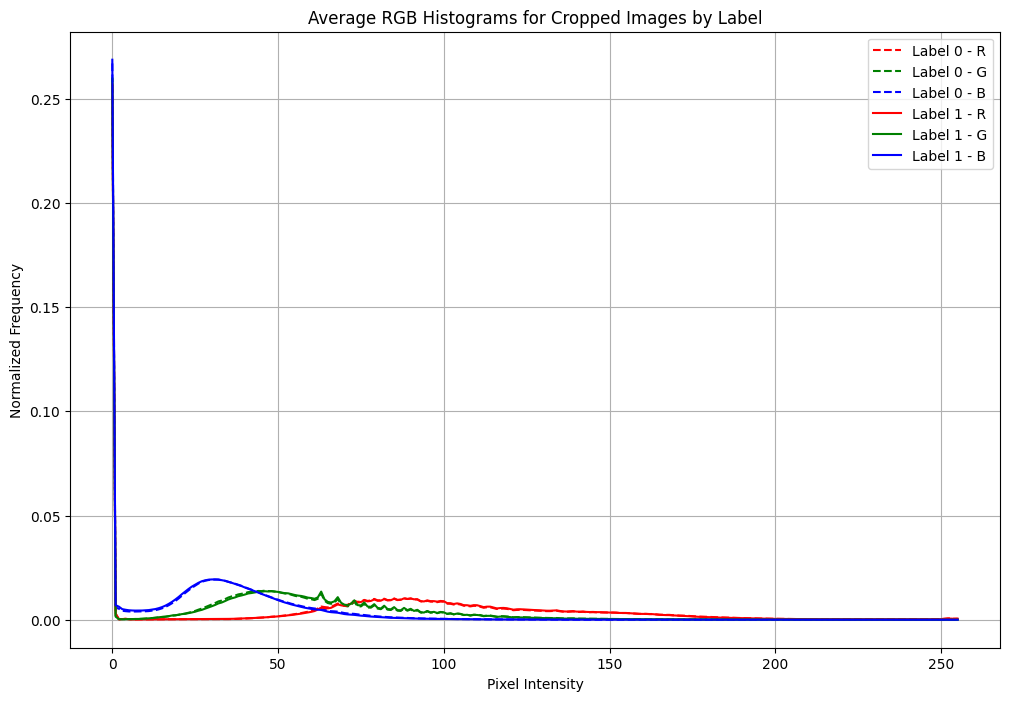

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import albumentations as A
import numpy as np

# 画像ファイルパスが含まれている列を取得
img_paths = df['img_path'].tolist()
labels = df['METS'].tolist()

# CenterCropの設定（クロップするサイズを指定）
crop_transform = A.Compose([
    A.CenterCrop(height=1200, width=1200, always_apply=True)  # 高さと幅を指定
])

# ラベルごとのヒストグラムの累積を保持する配列を作成（R, G, Bの3チャネル）
cumulative_hist_0 = [np.zeros((256, 1)) for _ in range(3)]  # R, G, B
cumulative_hist_1 = [np.zeros((256, 1)) for _ in range(3)]  # R, G, B
count_0 = 0
count_1 = 0

# すべての画像のヒストグラムを計算して累積
for img_path, label in tqdm(zip(img_paths, labels), total=len(img_paths)):
    # 画像をカラーで読み込む（RGB）
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Albumentationsで中心部分をクロップ
    cropped = crop_transform(image=img)['image']

    # RGBそれぞれのチャネルのヒストグラムを計算
    for i, color in enumerate(['R', 'G', 'B']):
        hist = cv2.calcHist([cropped], [i], None, [256], [0, 256])

        # ヒストグラムを累積
        if label == 0:
            cumulative_hist_0[i] += hist
        else:
            cumulative_hist_1[i] += hist

    if label == 0:
        count_0 += 1
    else:
        count_1 += 1

# ヒストグラムを平均化して正規化
average_hist_0 = [hist / count_0 for hist in cumulative_hist_0]
average_hist_1 = [hist / count_1 for hist in cumulative_hist_1]
for i in range(3):
    average_hist_0[i] /= average_hist_0[i].sum()
    average_hist_1[i] /= average_hist_1[i].sum()

# 平均ヒストグラムをプロット
plt.figure(figsize=(12, 8))

colors = ['red', 'green', 'blue']
labels = ['R', 'G', 'B']

# Label 0のプロット
for i, color in enumerate(colors):
    plt.plot(average_hist_0[i], color=color, linestyle='--', label=f'Label 0 - {labels[i]}')

# Label 1のプロット
for i, color in enumerate(colors):
    plt.plot(average_hist_1[i], color=color, label=f'Label 1 - {labels[i]}')

# グラフのタイトルとラベル
plt.title('Average RGB Histograms for Cropped Images by Label')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend(loc='upper right')
plt.grid(True)

# ヒストグラムを表示
plt.show()


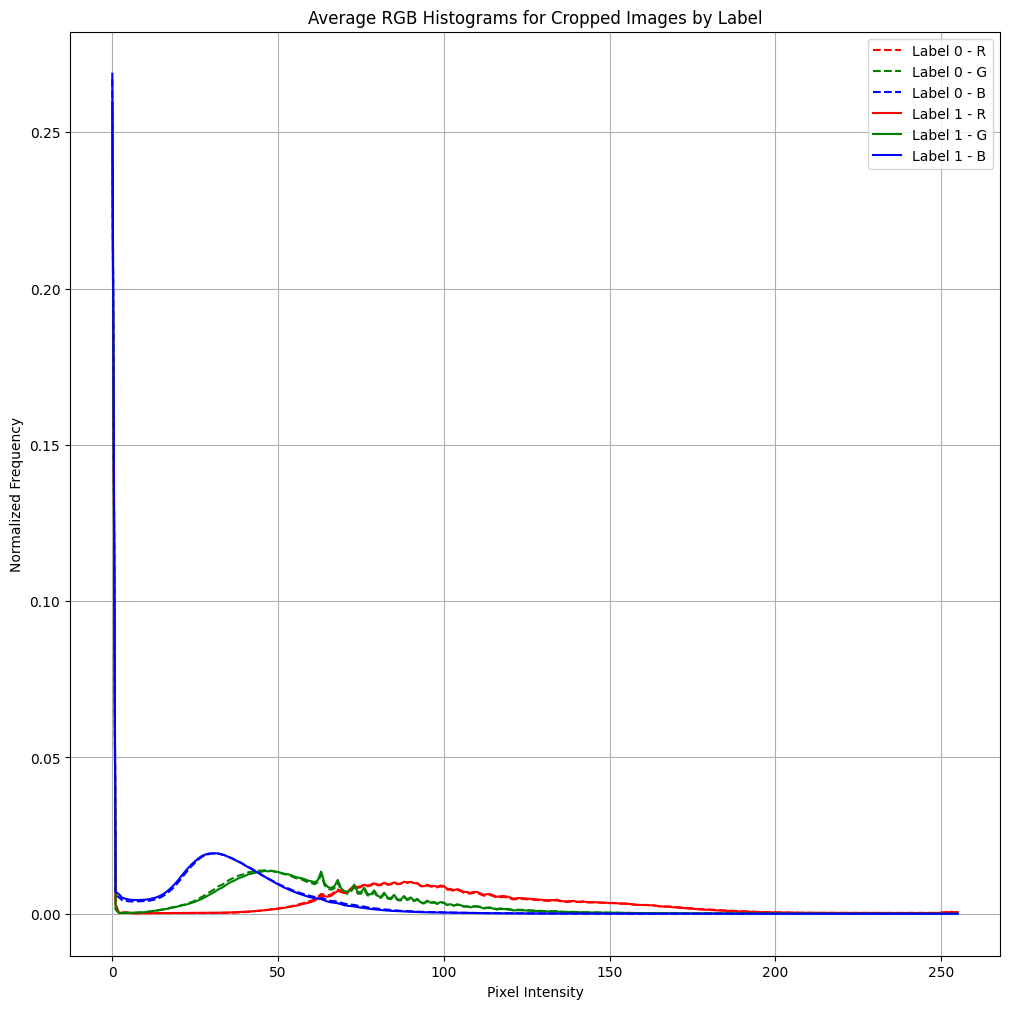

In [ ]:
# ヒストグラムを平均化して正規化
average_hist_0 = [hist / count_0 for hist in cumulative_hist_0]
average_hist_1 = [hist / count_1 for hist in cumulative_hist_1]
for i in range(3):
    average_hist_0[i] /= average_hist_0[i].sum()
    average_hist_1[i] /= average_hist_1[i].sum()

# 平均ヒストグラムをプロット
plt.figure(figsize=(12, 12))

colors = ['red', 'green', 'blue']
labels = ['R', 'G', 'B']

# Label 0のプロット
for i, color in enumerate(colors):
    plt.plot(average_hist_0[i], color=color, linestyle='--', label=f'Label 0 - {labels[i]}')

# Label 1のプロット
for i, color in enumerate(colors):
    plt.plot(average_hist_1[i], color=color, label=f'Label 1 - {labels[i]}')

# グラフのタイトルとラベル
plt.title('Average RGB Histograms for Cropped Images by Label')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend(loc='upper right')
plt.grid(True)

# ヒストグラムを表示
plt.show()

100%|██████████| 5000/5000 [02:59<00:00, 27.92it/s]


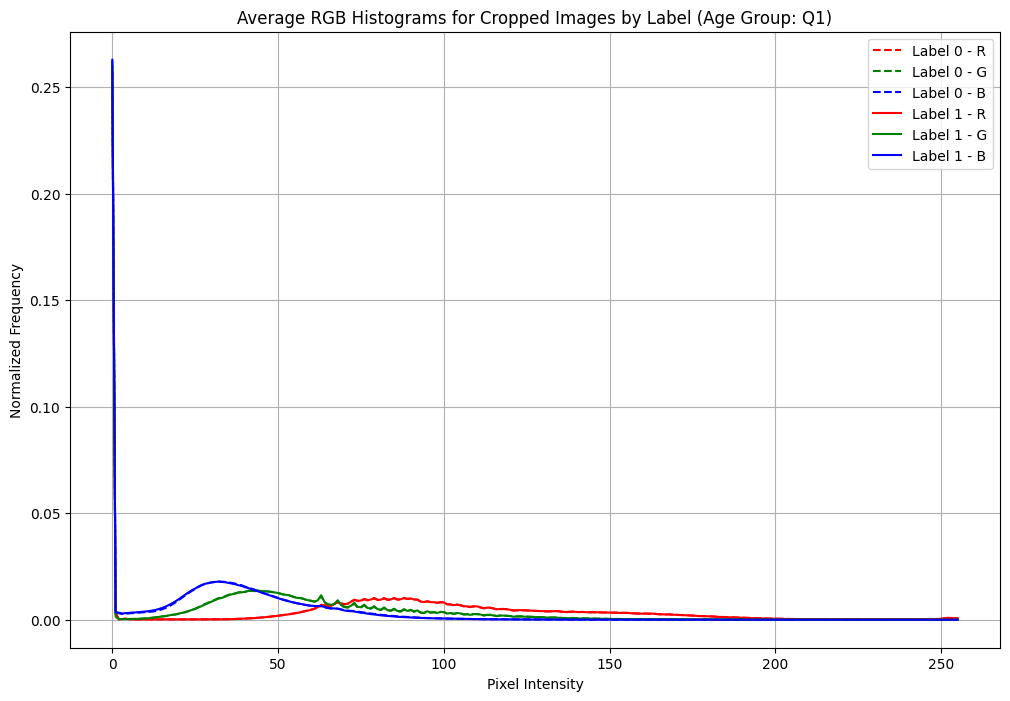

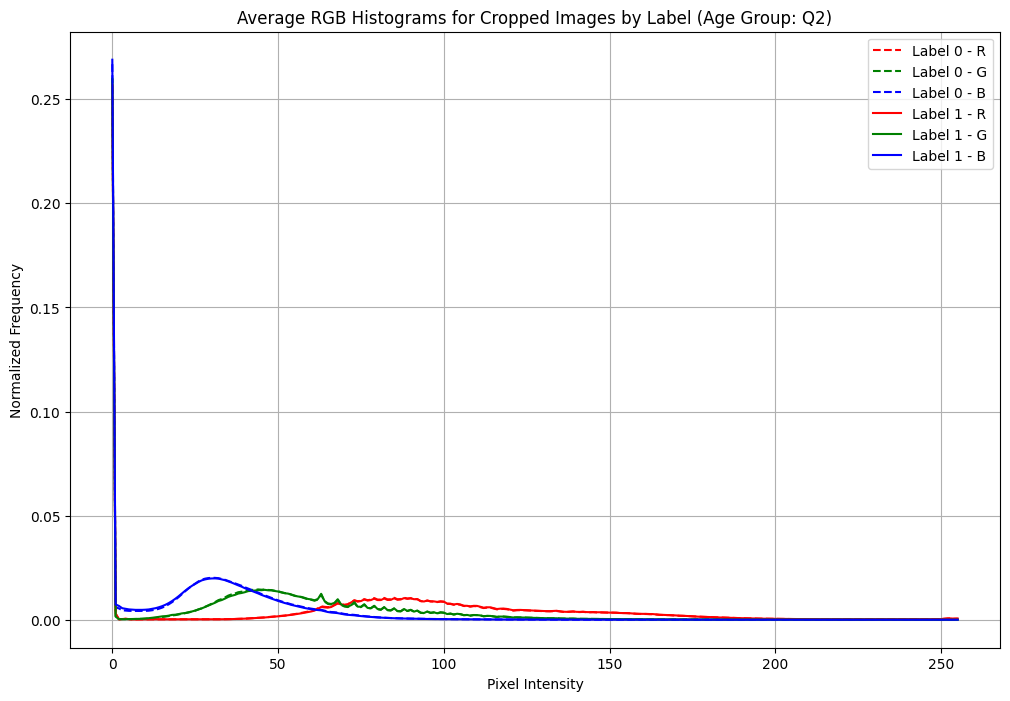

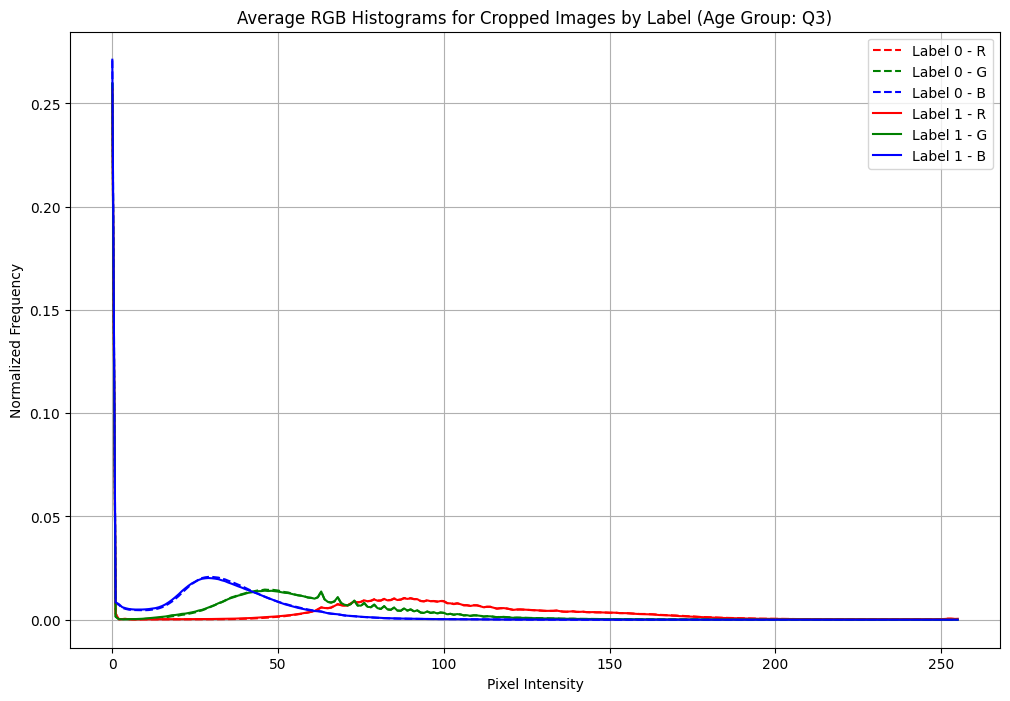

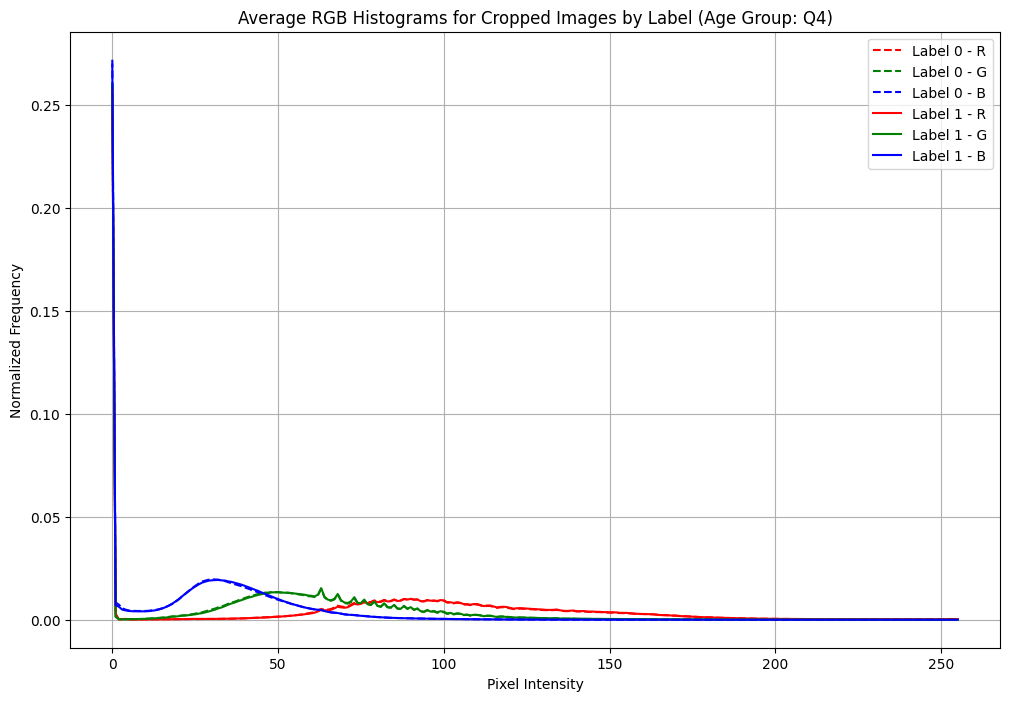

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import albumentations as A
import numpy as np
import pandas as pd

# 年齢を4つのカテゴリに分ける（四分位数を使用）
df['age_group'] = pd.qcut(df['age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# 画像ファイルパスとラベル、年齢カテゴリを取得
img_paths = df['img_path'].tolist()
labels = df['METS'].tolist()
age_groups = df['age_group'].tolist()

# CenterCropの設定（クロップするサイズを指定）
crop_transform = A.Compose([
    A.CenterCrop(height=1200, width=1200, always_apply=True)  # 高さと幅を指定
])

# 各年齢カテゴリごとのヒストグラムの累積を保持する配列を作成（R, G, Bの3チャネル）
cumulative_hist_0 = {age_group: [np.zeros((256, 1)) for _ in range(3)] for age_group in ['Q1', 'Q2', 'Q3', 'Q4']}
cumulative_hist_1 = {age_group: [np.zeros((256, 1)) for _ in range(3)] for age_group in ['Q1', 'Q2', 'Q3', 'Q4']}
count_0 = {age_group: 0 for age_group in ['Q1', 'Q2', 'Q3', 'Q4']}
count_1 = {age_group: 0 for age_group in ['Q1', 'Q2', 'Q3', 'Q4']}

# すべての画像のヒストグラムを計算して累積
for img_path, label, age_group in tqdm(zip(img_paths, labels, age_groups), total=len(img_paths)):
    # 画像をカラーで読み込む（RGB）
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Albumentationsで中心部分をクロップ
    cropped = crop_transform(image=img)['image']

    # RGBそれぞれのチャネルのヒストグラムを計算
    for i, color in enumerate(['R', 'G', 'B']):
        hist = cv2.calcHist([cropped], [i], None, [256], [0, 256])

        # ヒストグラムを累積
        if label == 0:
            cumulative_hist_0[age_group][i] += hist
        else:
            cumulative_hist_1[age_group][i] += hist

    # ラベルごとの画像数をカウント
    if label == 0:
        count_0[age_group] += 1
    else:
        count_1[age_group] += 1

# ヒストグラムを平均化して正規化
average_hist_0 = {age_group: [hist / count_0[age_group] for hist in cumulative_hist_0[age_group]] for age_group in ['Q1', 'Q2', 'Q3', 'Q4']}
average_hist_1 = {age_group: [hist / count_1[age_group] for hist in cumulative_hist_1[age_group]] for age_group in ['Q1', 'Q2', 'Q3', 'Q4']}

for age_group in ['Q1', 'Q2', 'Q3', 'Q4']:
    for i in range(3):
        if count_0[age_group] > 0:
            average_hist_0[age_group][i] /= average_hist_0[age_group][i].sum()
        if count_1[age_group] > 0:
            average_hist_1[age_group][i] /= average_hist_1[age_group][i].sum()

# 平均ヒストグラムをプロット
colors = ['red', 'green', 'blue']
labels_rgb = ['R', 'G', 'B']

for age_group in ['Q1', 'Q2', 'Q3', 'Q4']:
    plt.figure(figsize=(12, 8))
    plt.title(f'Average RGB Histograms for Cropped Images by Label (Age Group: {age_group})')

    # Label 0のプロット
    for i, color in enumerate(colors):
        if count_0[age_group] > 0:
            plt.plot(average_hist_0[age_group][i], color=color, linestyle='--', label=f'Label 0 - {labels_rgb[i]}')

    # Label 1のプロット
    for i, color in enumerate(colors):
        if count_1[age_group] > 0:
            plt.plot(average_hist_1[age_group][i], color=color, label=f'Label 1 - {labels_rgb[i]}')

    # グラフのタイトルとラベル
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Normalized Frequency')
    plt.legend(loc='upper right')
    plt.grid(True)

    # ヒストグラムを表示
    plt.show()


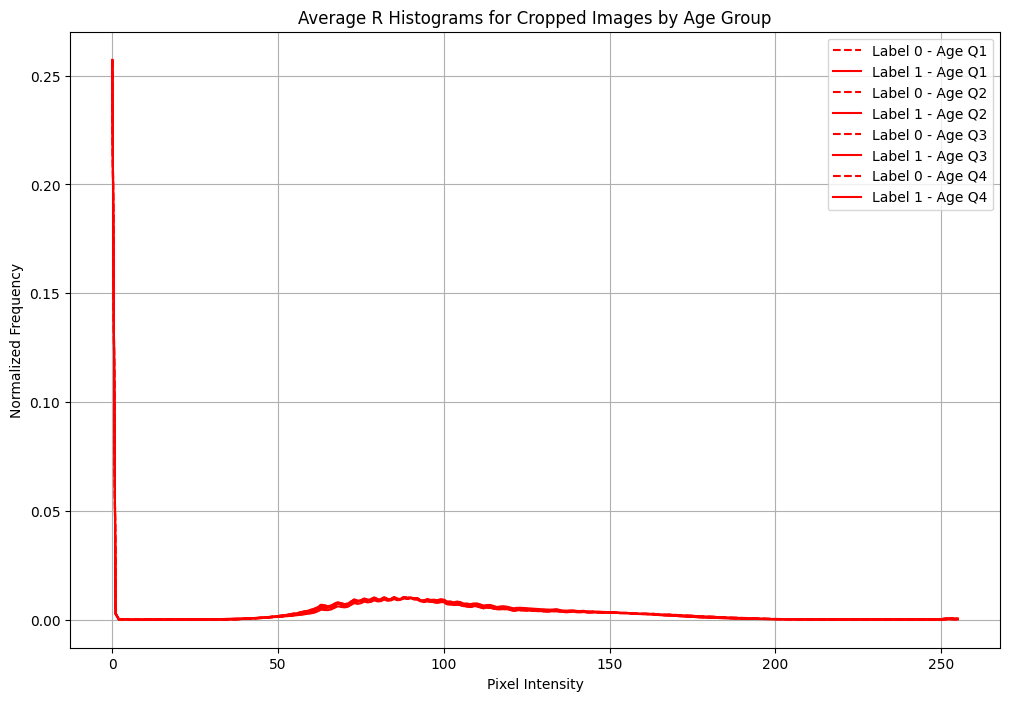

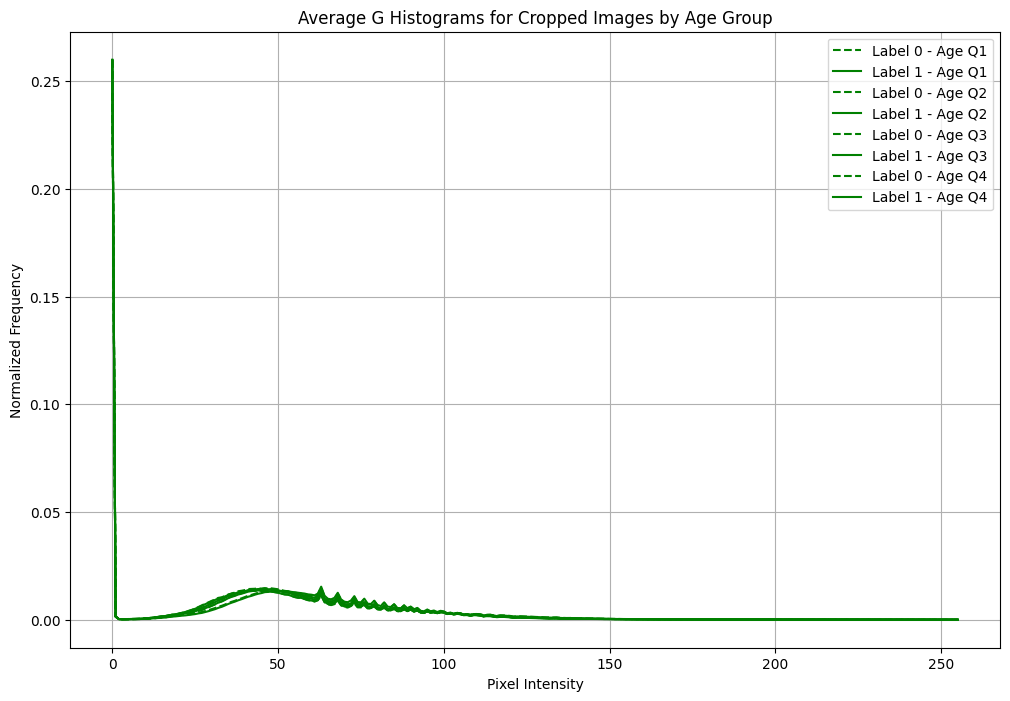

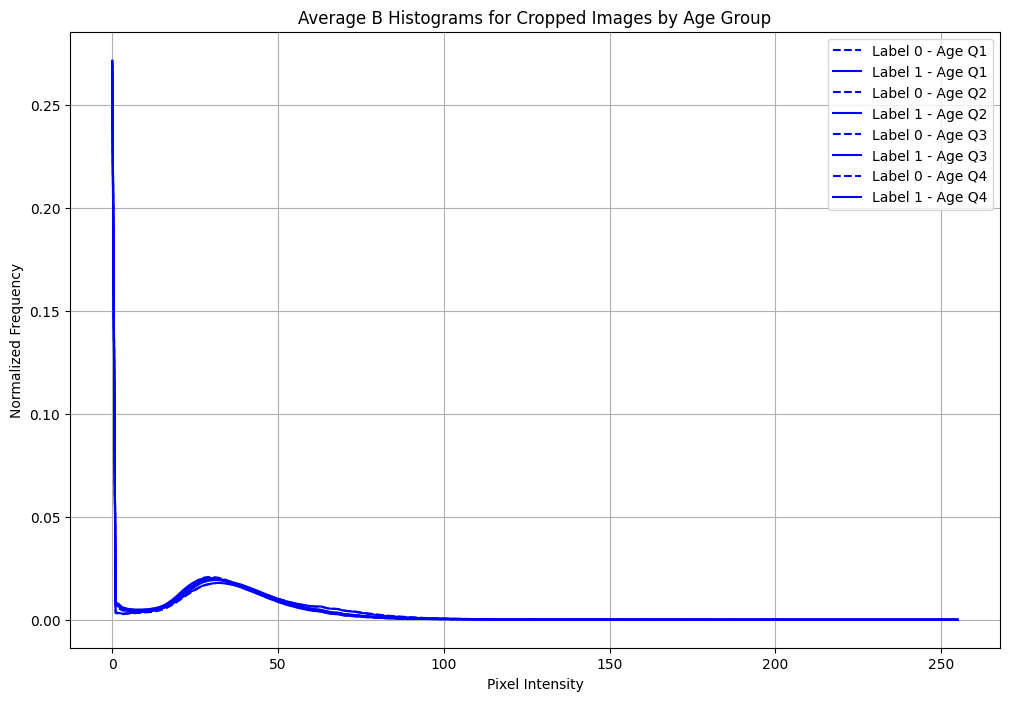

In [ ]:

for i, color in enumerate(colors):  # RGBごとにグラフを作成
    plt.figure(figsize=(12, 8))
    plt.title(f'Average {labels_rgb[i]} Histograms for Cropped Images by Age Group')

    # 各年齢グループに対してプロット
    for age_group in ['Q1', 'Q2', 'Q3', 'Q4']:
        # Label 0のプロット
        if count_0[age_group] > 0:
            plt.plot(average_hist_0[age_group][i], color=color, linestyle='--', label=f'Label 0 - Age {age_group}')

        # Label 1のプロット
        if count_1[age_group] > 0:
            plt.plot(average_hist_1[age_group][i], color=color, label=f'Label 1 - Age {age_group}')

    # グラフのタイトルとラベル
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Normalized Frequency')
    plt.legend(loc='upper right')
    plt.grid(True)

    # ヒストグラムを表示
    plt.show()